In [54]:
from pathlib import Path
import pandas as pd
import hvplot.pandas
import numpy as np

In [37]:
df_home_sales = pd.read_csv(Path("national-home-sales.csv"))

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   period_end_date    103 non-null    datetime64[ns]
 1   inventory          103 non-null    int64         
 2   homes_sold         103 non-null    int64         
 3   median_sale_price  103 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.3 KB


In [39]:
df_home_sales["period_end_date"] = pd.to_datetime(df_home_sales["period_end_date"])

In [40]:
df_home_sales.set_index("period_end_date", inplace=True)

In [41]:
df_home_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 2020-01-01 to 2019-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   inventory          103 non-null    int64
 1   homes_sold         103 non-null    int64
 2   median_sale_price  103 non-null    int64
dtypes: int64(3)
memory usage: 3.2 KB


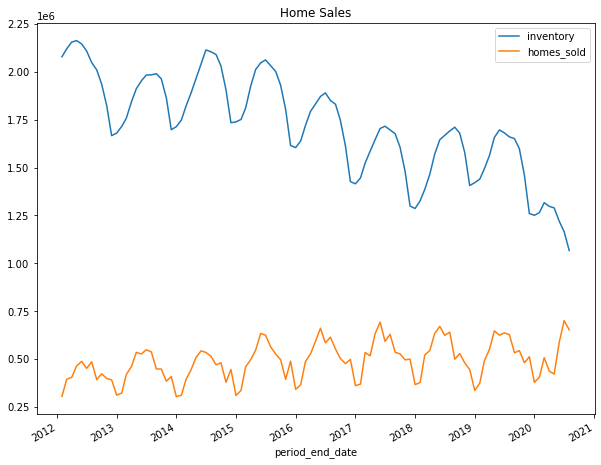

In [42]:
# Plot the inventory and homes_sold series
df_home_sales[["inventory", "homes_sold"]].plot(
    title = "Home Sales",
    figsize = (10,8)

);

<AxesSubplot:title={'center':'Homes Sold in 2014'}, xlabel='period_end_date'>

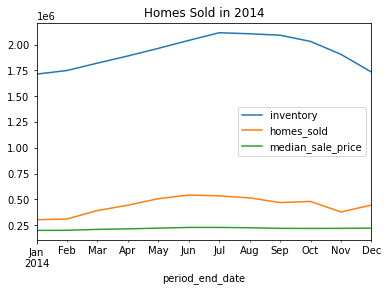

In [43]:
# Plot 2014 home sales data
sales_2014 = df_home_sales.loc["2014"]

sales_2014.plot(title="Homes Sold in 2014")


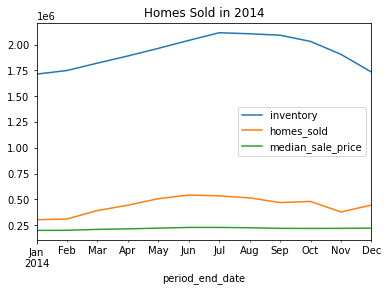

In [45]:
# Plot 2014 home sales data
sales_2014.plot(title="Homes Sold in 2014");


In [46]:
df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.quarter]).sum()

period_end_date
1    10081561
2    14788243
3    14518462
4    11126303
Name: homes_sold, dtype: int64

In [48]:
quarterly_sales_per_year = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.year, df_home_sales.index.quarter]).sum()

<AxesSubplot:xlabel='period_end_date,period_end_date'>

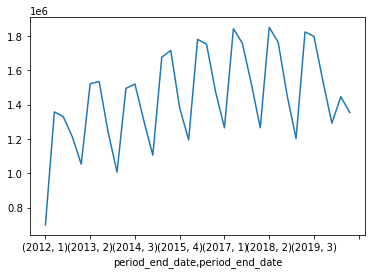

In [49]:
# Plot total quarterly home sales per year
quarterly_sales_per_year.plot()


In [55]:
# Plot quarterly home sales per year using a heatmap
df_home_sales.hvplot.heatmap(
    x="index.year",
    y="index.quarter",
    C="homes_sold",
    cmap="blues"
).aggregate(function=np.mean)


:HeatMap   [index.year,index.quarter]   (homes_sold)

In [56]:
# Compute the correlation between "inventory" and "homes_sold"
df_home_sales[["inventory", "homes_sold"]].corr()


,inventory,homes_sold
inventory,1.000000,-0.006937
homes_sold,-0.006937,1.000000
